## Loading Dataset


Number of nodes: 54573
Number of edges: 498202


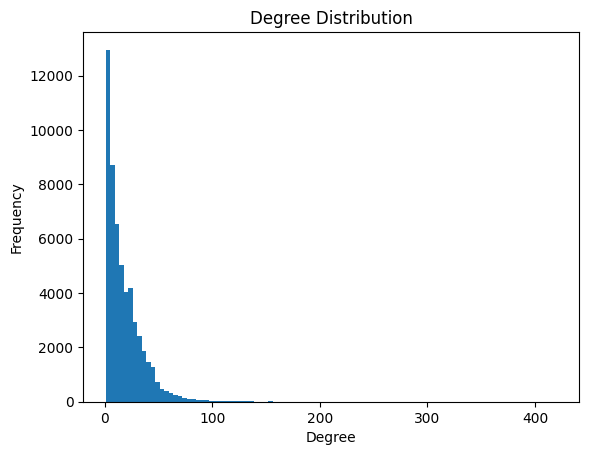

In [ ]:
import networkx as nx
import json
import matplotlib.pyplot as plt

# Load edges from the .edges file
edges_file = '../data/soc-gemsec-HR.edges'
edges = []
with open(edges_file, 'r') as f:
    for line in f:
        src, dst = map(float, line.split(','))
        edges.append((src, dst))

# Load node metadata from the .json file
metadata_file = '../data/soc-gemsec-HR.json'
with open(metadata_file, 'r') as f:
    node_metadata = json.load(f)

# Create a graph and add edges
G = nx.Graph()
G.add_edges_from(edges)

# Add metadata to nodes
for node, genres in node_metadata.items():
    G.nodes[int(node)]['genres'] = genres

# Basic info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Compute degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure()
plt.hist(degree_sequence, bins=100)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Average path length
avg_path_length = nx.average_shortest_path_length(G)
print(f"Average Path Length: {avg_path_length}")

# Clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {clustering_coefficient}")

# Density
density = nx.density(G)
print(f"Density: {density}")

# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity: {assortativity}")

# Visualize the graph (small sample for readability)
small_G = G.subgraph(list(G.nodes)[:100])
pos = nx.spring_layout(small_G)
plt.figure(figsize=(12, 12))
nx.draw(small_G, pos, node_size=20, node_color='blue', edge_color='gray')
plt.title("Visualization of a Subgraph")
plt.show()
